In [1]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 84s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

(32, 32, 3)

<Figure size 1080x1512 with 0 Axes>

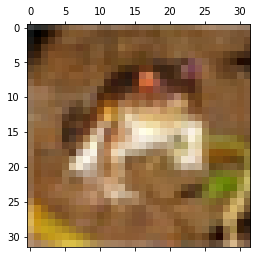

In [8]:
plt.figure(figsize=(15,21))
plt.matshow(X_train[0])

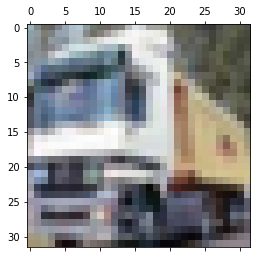

In [9]:
plt.matshow(X_train[1])

In [13]:
y_train.shape

# y_train[:5]

(50000, 1)

In [15]:
#for y_train, we don't need 2D array, because it's just direct categories
#  -1 because we want the same 50k samples.
y_train = y_train.reshape(-1,)
# y_train.shape
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# function of showing image
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X=X[index])
    plt.xlabel(classes[y[index]])

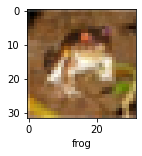

In [19]:
plot_sample(X_train,y_train,0)

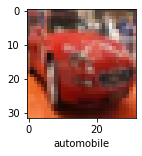

In [22]:
plot_sample(X_train,y_train,5)

# Normalize the data

In [24]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [25]:
X_train = X_train/255
X_test = X_test/255

In [27]:
# simple NN
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)) ,
    layers.Dense(units = 3000 , activation='relu') ,
    layers.Dense(units = 1000 , activation='relu') ,
    layers.Dense(units = 10   , activation = 'sigmoid')
])

# compile the model
# when 'y' is one hot encoded vector then use categorical_crossentropy
# but when 'y' is an integer like(1,2,3,..) then use sparse_categorical_crossentropy
ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
# train
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.8150 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.6237 - accuracy: 0.4270
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5411 - accuracy: 0.4581
Epoch 4/5
1563/1563 [==============================] - 712s 456ms/step - loss: 1.4809 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4322 - accuracy: 0.4947


In [28]:
# evaluate on test samples
ann.evaluate(x=X_test,y=y_test)
# 47% accuracy (bad)

313/313 [==============================] - 6s 17ms/step - loss: 1.5260 - accuracy: 0.4565


[1.525992751121521, 0.45649999380111694]

In [36]:
# classification report
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(x=X_test)
y_pred_classes = [np.argmax(x) for x in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.54      0.50      1000
           1       0.68      0.40      0.51      1000
           2       0.48      0.17      0.25      1000
           3       0.37      0.31      0.34      1000
           4       0.36      0.56      0.44      1000
           5       0.55      0.20      0.30      1000
           6       0.51      0.57      0.54      1000
           7       0.71      0.32      0.44      1000
           8       0.51      0.71      0.60      1000
           9       0.36      0.77      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



# CNN to improve the performance of model

In [40]:
cnn = models.Sequential([
    #cnn layers - 
    
    #Conv Layer 1 -(Convolution + relu) then pooling(max)
    layers.Conv2D(filters=32 , kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    #Conv Layer 2 -(Convolution + relu) then pooling(max)
    layers.Conv2D(filters=32 , kernel_size=(3,3) ,activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    
    #dense layers
    layers.Flatten(),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(10,activation='softmax') #softmax will normalize the output probability
])


# suppose in sigmoid the probability comes like this for 2 classes:
# 1: 0.45
# 2: 0.67

# # in softmax it is normalized like this :
# 1: (0.45) / (0.45 + 0.67)
# 2: (0.67) / (0.45 + 0.67)

In [41]:
# compile
cnn.compile(optimizer='adam',
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [42]:
#train
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5236 - accuracy: 0.4513
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2061 - accuracy: 0.5754
Epoch 3/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0724 - accuracy: 0.6257
Epoch 4/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9899 - accuracy: 0.6537
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9292 - accuracy: 0.6746
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8807 - accuracy: 0.6933
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8326 - accuracy: 0.7117
Epoch 8/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7914 - accuracy: 0.7248
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7595 - accuracy: 0.7340
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [43]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9450 - accuracy: 0.6861


[0.9449984431266785, 0.6861000061035156]

(10000,)


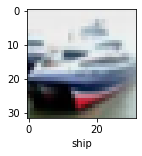

In [45]:
y_test = y_test.reshape(-1,) #now converted to 1 d array
print(y_test.shape)
plot_sample(X_test,y_test,1)

In [47]:
y_pred = cnn.predict(x=X_test)
y_pred[:5]
# the values in 'y_pred' are distributed between 0 and 1 due to 'softmax' at last layer


array([[4.5200107e-03, 1.6584723e-05, 9.8523283e-03, 8.6134392e-01,
        1.7844974e-04, 5.4689411e-02, 6.2405929e-02, 3.8768051e-03,
        2.8062924e-03, 3.1022652e-04],
       [3.2501042e-02, 3.1653878e-01, 1.0110059e-05, 1.7081499e-06,
        1.8758485e-07, 8.9676384e-08, 3.5332612e-06, 1.9119698e-08,
        6.4911211e-01, 1.8324628e-03],
       [7.7378228e-02, 3.7521482e-02, 8.5797341e-04, 2.0444880e-03,
        1.2736897e-04, 3.6786729e-05, 1.1278488e-04, 1.2971301e-04,
        8.7832189e-01, 3.4693009e-03],
       [5.0133950e-01, 4.4645350e-03, 2.6173212e-03, 2.6219743e-04,
        4.7975048e-04, 4.9248806e-06, 3.3229044e-05, 5.0446789e-07,
        4.9045885e-01, 3.3925835e-04],
       [8.2306406e-06, 1.1114386e-04, 9.3426062e-03, 1.2508743e-01,
        7.6988870e-01, 1.0311124e-02, 8.4750794e-02, 2.9305357e-04,
        1.9172371e-04, 1.5128491e-05]], dtype=float32)

In [50]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [51]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

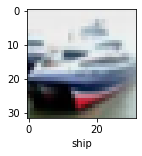

In [52]:
plot_sample(X_test,y_test,1)

In [53]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [57]:
# for 1 st sample it was ship and predicted as 'ship'
classes[y_classes[1]]

'ship'

In [58]:
# for 0 th sample
classes[y_classes[0]]

'cat'

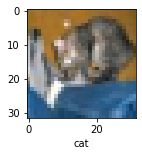

In [59]:
plot_sample(X_test,y_test,0)

In [61]:
# classification report
print('Classification Report: \n' , classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.81      0.71      1000
           1       0.79      0.84      0.82      1000
           2       0.57      0.61      0.59      1000
           3       0.56      0.45      0.50      1000
           4       0.66      0.59      0.62      1000
           5       0.65      0.51      0.57      1000
           6       0.69      0.81      0.75      1000
           7       0.76      0.70      0.73      1000
           8       0.74      0.81      0.78      1000
           9       0.80      0.71      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.68     10000
weighted avg       0.69      0.69      0.68     10000

